In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# définition des fonctions k1, l1, k2, l2 et g
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

In [7]:
def fct_Verlet_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode de Verlet (velocity Verlet) pour le problème de Kepler.

    Arguments :
    - x0, y0 : positions initiales (UA)
    - x_prime0, y_prime0 : vitesses initiales
    - tmin, tmax : intervalle de temps
    - pas : pas de discrétisation
    - K1 : fonction accélération en x: K1(x, y, G, M)
    - K2 : fonction vitesse en x: K2(u, v)
    - L1 : fonction accélération en y: L1(x, y, G, M)
    - L2 : fonction vitesse en y: L2(u, v)
    - G, M : constante gravitationnelle et masse de l'étoile

    Retourne :
    - x : tableau des positions en x
    - y : tableau des positions en y
    - t : tableau des instants de temps
    """
    # Nombre de pas de temps
    N = int((tmax - tmin) / pas) + 1

    # Initialisation des tableaux
    t = np.linspace(tmin, tmax, N)
    x = np.zeros(N)
    y = np.zeros(N)
    u = np.zeros(N)  # vitesse en x
    v = np.zeros(N)  # vitesse en y

    # Conditions initiales
    x[0] = x0
    y[0] = y0
    u[0] = x_prime0
    v[0] = y_prime0

    # Calcul des accélérations initiales
    ax_old = K1(x[0], y[0], G, M)
    ay_old = L1(x[0], y[0], G, M)

    # Boucle d'intégration par la méthode de Verlet
    for i in range(1, N):
        # 1. Mettre à jour les positions en utilisant les vitesses et accélérations actuelles
        x[i] = x[i-1] + u[i-1]*pas + 0.5*ax_old*pas**2
        y[i] = y[i-1] + v[i-1]*pas + 0.5*ay_old*pas**2

        # 2. Calculer les nouvelles accélérations aux nouvelles positions
        ax_new = K1(x[i], y[i], G, M)
        ay_new = L1(x[i], y[i], G, M)

        # 3. Mettre à jour les vitesses en utilisant la moyenne des accélérations
        u[i] = u[i-1] + 0.5*(ax_old + ax_new)*pas
        v[i] = v[i-1] + 0.5*(ay_old + ay_new)*pas

        # 4. Sauvegarder les accélérations pour la prochaine itération
        ax_old = ax_new
        ay_old = ay_new

    return x, y, t

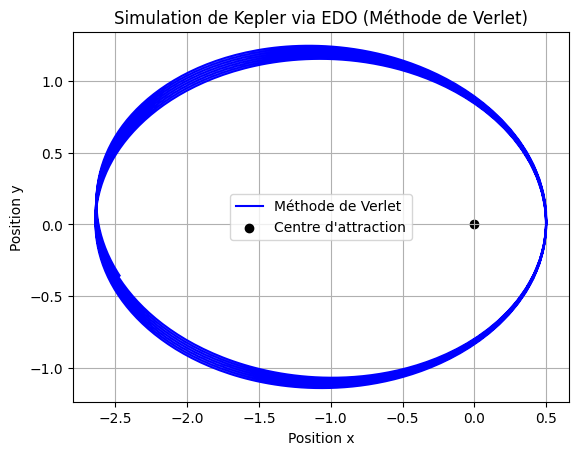

In [8]:
# paramètres et conditions initiales
from matplotlib import legend


M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

u1 = x_prime0 + h*k1(x0,y0, G_temp, M_soleil)
v1 = y_prime0 + h*l1(x0,y0, G_temp, M_soleil)
x1 = x0 + h*k2(x_prime0,y_prime0)
y1 = y0 + h*l2(x_prime0,y_prime0)


# méthode d'Euler-Richardson
xVerlet, yVerlet, t = fct_Verlet_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, k1, k2, l1, l2, G_temp, M_soleil)

# méthode de Runge-Kutta d'ordre 2, conditions initiales différentes
t_min = 0.0
t_max = 15.0
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = -2.1  # vitesse astre initiale (x)
y_prime0 = 15.5  # vitesse astre initiale (y)

# Tracer les trajectoires
plt.figure()
plt.plot(xVerlet, yVerlet, label="Méthode de Verlet", linestyle="-", color="b")
# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO (Méthode de Verlet)")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()